<a href="https://colab.research.google.com/github/SylwiaJa/med-cnn-fracture/blob/main/0_data_preview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# --- Download FracAtlas from Kaggle -----------------

!pip install -q kaggle

from google.colab import files
uploaded = files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d mahmudulhasantasin/fracatlas-original-dataset -p /content/data
!unzip -q /content/data/fracatlas-original-dataset.zip -d /content/data/fracatlas

Dataset URL: https://www.kaggle.com/datasets/mahmudulhasantasin/fracatlas-original-dataset
License(s): CC0-1.0
 94% 302M/323M [00:00<00:00, 553MB/s]
100% 323M/323M [00:00<00:00, 605MB/s]


In [6]:
# --- Dataset -----------------
import pandas as pd

csv_path = "/content/data/fracatlas/FracAtlas/dataset.csv"
df = pd.read_csv(csv_path)
df.head()


,image_id,hand,leg,hip,shoulder,mixed,hardware,multiscan,fractured,fracture_count,frontal,lateral,oblique
0,IMG0000000.jpg,0,1,0,0,0,0,1,0,0,1,1,0
1,IMG0000001.jpg,0,1,0,0,0,0,1,0,0,1,1,0
2,IMG0000002.jpg,0,1,0,0,0,0,1,0,0,1,1,0
3,IMG0000003.jpg,0,1,0,0,0,0,1,0,0,0,1,1
4,IMG0000004.jpg,0,1,0,0,0,0,1,0,0,0,1,1


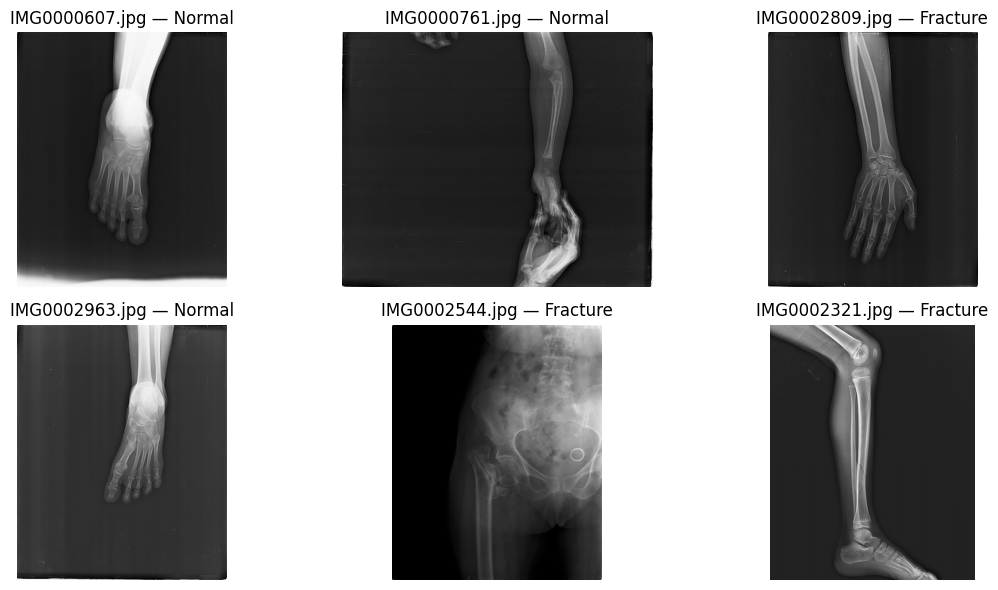

In [9]:
import matplotlib.pyplot as plt
import cv2
import os

base_dir = "/content/data/fracatlas/FracAtlas/images"

sample = df.sample(6, random_state=42)

plt.figure(figsize=(12, 6))

for idx, row in enumerate(sample.itertuples()):
    subfolder = "Fractured" if row.fractured else "Non_fractured"
    img_path = os.path.join(base_dir, subfolder, row.image_id)

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(2, 3, idx + 1)
    if img is not None:
        plt.imshow(img, cmap="gray")
        label = "Fracture" if row.fractured else "Normal"
        plt.title(f"{row.image_id} — {label}")
    else:
        plt.title("Not possible to load")

    plt.axis("off")

plt.tight_layout()
plt.show()
